In [2]:
import sys
from pathlib import Path

repo_path = Path("..") / ".."/"RatInABox"  # relative path of RatInABox repo from the notebook
sys.path.insert(0, str(repo_path.resolve()))

import ratinabox

from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *
from tqdm.notebook import tqdm  # gives time bar

import pandas as pd
import numpy as np
#stylize plots and set figure directory for saving 
ratinabox.stylize_plots(); ratinabox.autosave_plots=True; ratinabox.figure_directory="../figures/"

/Users/saramolasmedina/Documents/RatInABox/ratinabox/Agent.py:146: UserWarning: Warning: You have solid 1D boundary conditions and non-zero speed mean.
  "Warning: You have solid 1D boundary conditions and non-zero speed mean."


  0%|          | 0/6000 [00:00<?, ?it/s]

Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_23/place_cell_locations_1937.png  & .svg
min pos:  0.5567089325747993
max pos:  0.9999974890028481
min pos_where_spiked:  0.5809124450714139
max pos_where_spiked:  0.9999609437782084
min pos:  0.5567089325747993
max pos:  0.9999974890028481
min pos_where_spiked:  0.5628244637807553
max pos_where_spiked:  0.9999974890028481
Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_23/PlaceCells_ratemaps_1937.png  & .svg


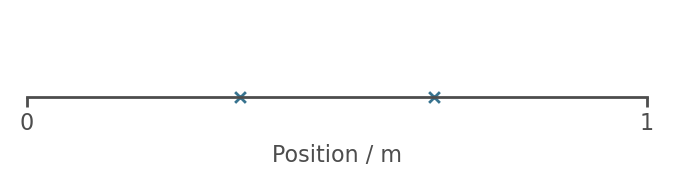

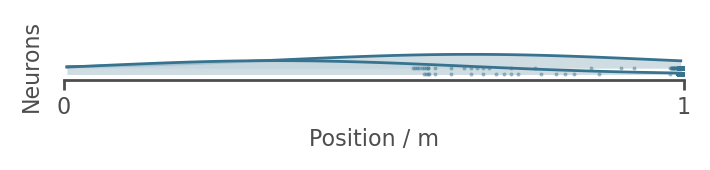

In [3]:
# 0. Set random seed.
np.random.seed(3)

# 1. Initialise environment.
Env = Environment(params={"dimensionality": "1D", "scale": 1})

# 2. Add Agent.
Ag = Agent(Env)
#Ag.pos = np.array([0.5])
Ag.speed_mean = 0.2

# 3. Add place cells.
PCs = PlaceCells(
    Ag,
    params={
        "n": 2, 
        "description": "gaussian",
        "widths": 0.30,
        "max_fr": 10,
        "min_fr": 0.1,
        "color": "C1",
    },
)

# 4. Simulate.
dt = 50e-3
T = 5 * 60 #5 mins  

for i in tqdm(range(int(T / dt))):
    Ag.update(dt=dt)
    PCs.update()

# 5. Plot place cell center locations
fig, ax = PCs.plot_place_cell_locations()

# 6. Plot rate maps
fig, ax = PCs.plot_rate_map(chosen_neurons="all", method="groundtruth", spikes=True)